# Taxonomy encoding

In [1]:
import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

In [2]:
rng = np.random.RandomState(12)
dim = 64*2

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)

incr = vocab.parse("INCREMENT")
zero = vocab.parse("ZERO")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT+B"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT+C"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT+D"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT+E"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT+F"))

vocab.add("SIX", vocab.parse("ZERO*INCREMENT+G"))
vocab.add("SEVEN", vocab.parse("ONE*INCREMENT+H"))

vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT+I"))
vocab.add("NINE", vocab.parse("SEVEN*INCREMENT+J"))


one = vocab.parse("ONE")
two = vocab.parse("TWO")
three = vocab.parse("THREE")
four = vocab.parse("FOUR")
five = vocab.parse("FIVE")
six = vocab.parse("SIX")
seven = vocab.parse("SEVEN")
eight = vocab.parse("EIGHT")
nine = vocab.parse("NINE")

/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=10)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=14)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=16)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=128, M=18)
  len(self.pointers)))


In [3]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~one*seven + ~two*three + ~seven*eight).v / 1 #5
T = spa.SemanticPointer(T)

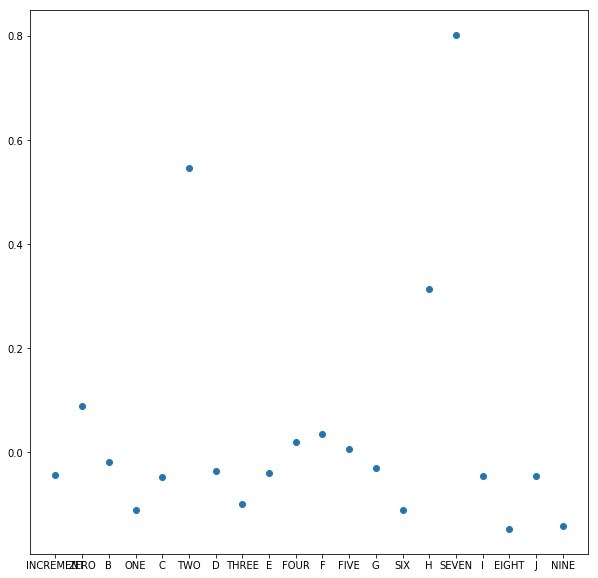

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


test = (eight *~T).v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name)
    similarity.append(vec.compare(test))
   
plt.figure(figsize = (10,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   

Succ1, succ2, succ3 all work here. 
However, for every answer, the other nodes at the same level (though with different parents) also show up as close contenders, but a threshold at 0.7 will still work.

Loos like a threshold at 0.7 could work